In [962]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [963]:
df = pd.read_csv('titanic_data.csv')
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [964]:
df.shape

(889, 15)

In [965]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     889 non-null    int64  
 1   pclass       889 non-null    int64  
 2   sex          889 non-null    object 
 3   age          713 non-null    float64
 4   sibsp        889 non-null    int64  
 5   parch        889 non-null    int64  
 6   fare         889 non-null    float64
 7   embarked     887 non-null    object 
 8   class        889 non-null    object 
 9   who          889 non-null    object 
 10  adult_male   889 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  887 non-null    object 
 13  alive        889 non-null    object 
 14  alone        889 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.2+ KB


In [966]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,889.000000,889.000000,713.000000,889.000000,889.000000,889.000000
mean,0.384702,2.307087,29.698696,0.523060,0.382452,32.259059
std,0.486799,0.836367,14.536691,1.103729,0.806761,49.735870
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.000000,0.000000,0.000000,7.925000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [967]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            176
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           686
embark_town      2
alive            0
alone            0
dtype: int64

In [968]:
df.drop('deck', axis=1,inplace=True)
df.isna().sum()

survived         0
pclass           0
sex              0
age            176
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64

In [969]:
df['age'] = df['age'].fillna(df['age'].median())
# df.dropna(inplace=True)
df.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

In [970]:
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])
df['embarked'] = df['embarked'].fillna(df['embark_town'].mode()[0])
df.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [971]:
df.duplicated().sum()

116

In [972]:
df.drop_duplicates(inplace=True)

In [973]:
df.duplicated().sum()

0

In [974]:
df.shape

(773, 14)

In [975]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,2,0,False
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,0,1,False
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,2,1,True
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,1,False
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,2,0,True
5,0,3,1,28.0,0,0,8.4583,1,2,1,True,1,0,True
6,0,1,1,54.0,0,0,51.8625,2,0,1,True,2,0,True
7,0,3,1,2.0,3,1,21.0750,2,2,0,False,2,0,False
8,1,3,0,27.0,0,2,11.1333,2,2,2,False,2,1,False
9,1,2,0,14.0,1,0,30.0708,0,1,0,False,0,1,False


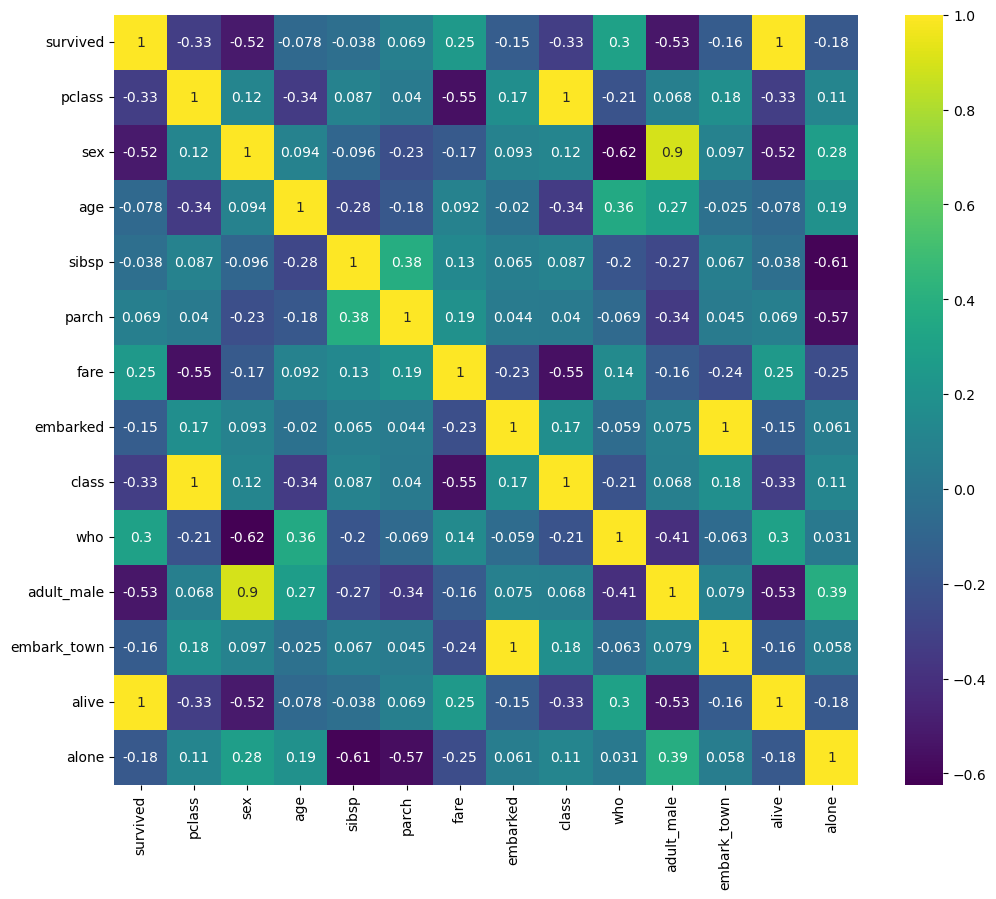

In [976]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.show()

In [977]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

In [978]:
df.drop(['alive', 'pclass', 'adult_male', 'embark_town'], axis=1 ,inplace=True)

In [979]:
df.shape

(773, 10)

In [980]:
df.head()

,survived,sex,age,sibsp,parch,fare,embarked,class,who,alone
0,0,1,22.0,1,0,7.2500,2,2,1,False
1,1,0,38.0,1,0,71.2833,0,0,2,False
2,1,0,26.0,0,0,7.9250,2,2,2,True
3,1,0,35.0,1,0,53.1000,2,0,2,False
4,0,1,35.0,0,0,8.0500,2,2,1,True


In [981]:
print(df['survived'].value_counts())
print(df['embarked'].value_counts())
print(df['class'].value_counts())
print(df['who'].value_counts())
print(df['sex'].value_counts())

0    453
1    320
Name: survived, dtype: int64
2    559
0    155
1     57
3      2
Name: embarked, dtype: int64
2    399
0    210
1    164
Name: class, dtype: int64
1    441
2    250
0     82
Name: who, dtype: int64
1    481
0    292
Name: sex, dtype: int64


In [982]:
df['embarked'] = df['embarked'].apply(lambda x: x if x != 'Southampton' else 'S')

In [983]:
print(df['survived'].value_counts())
print(df['embarked'].value_counts())
print(df['class'].value_counts())
print(df['who'].value_counts())
print(df['sex'].value_counts())

0    453
1    320
Name: survived, dtype: int64
2    559
0    155
1     57
3      2
Name: embarked, dtype: int64
2    399
0    210
1    164
Name: class, dtype: int64
1    441
2    250
0     82
Name: who, dtype: int64
1    481
0    292
Name: sex, dtype: int64


In [984]:
df.drop(['sex'], axis=1 ,inplace=True)

In [985]:
df.head()

,survived,age,sibsp,parch,fare,embarked,class,who,alone
0,0,22.0,1,0,7.2500,2,2,1,False
1,1,38.0,1,0,71.2833,0,0,2,False
2,1,26.0,0,0,7.9250,2,2,2,True
3,1,35.0,1,0,53.1000,2,0,2,False
4,0,35.0,0,0,8.0500,2,2,1,True


In [986]:
df.shape

(773, 9)

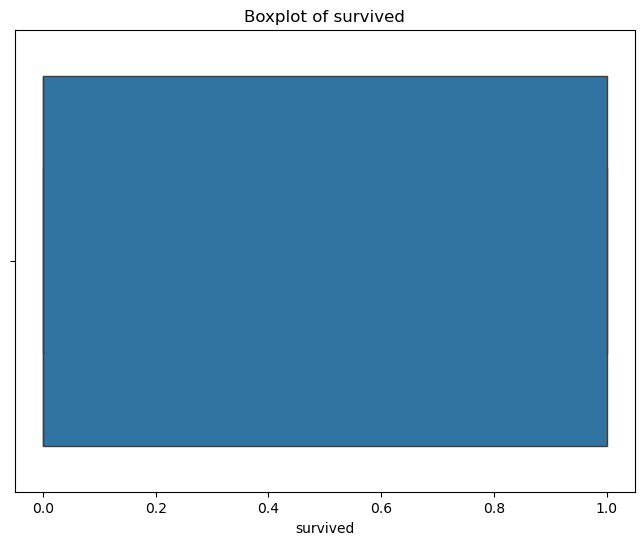

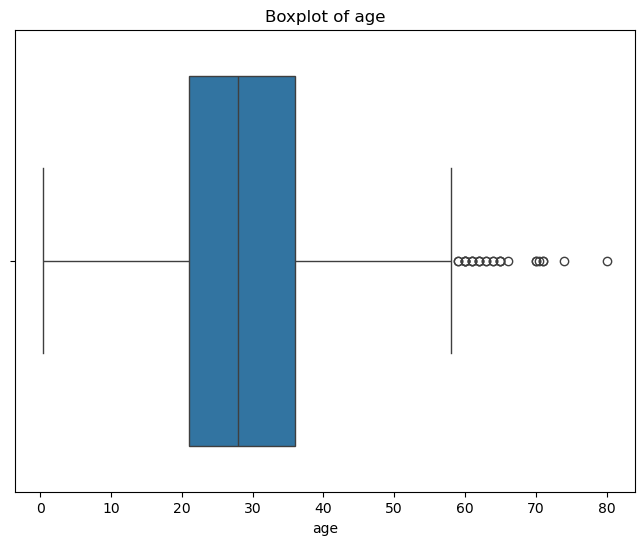

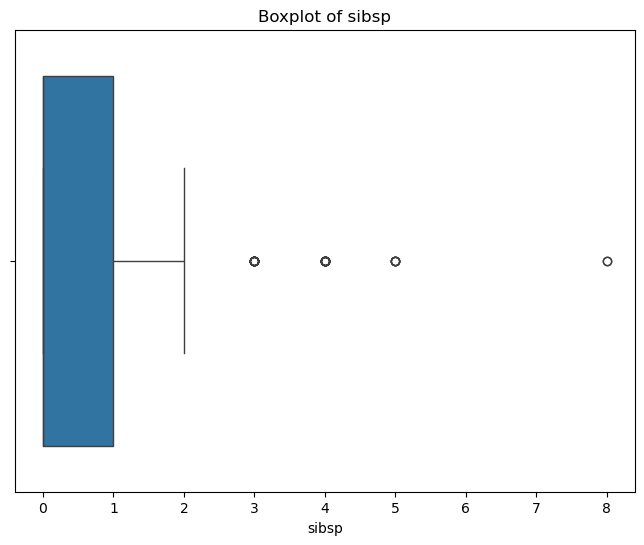

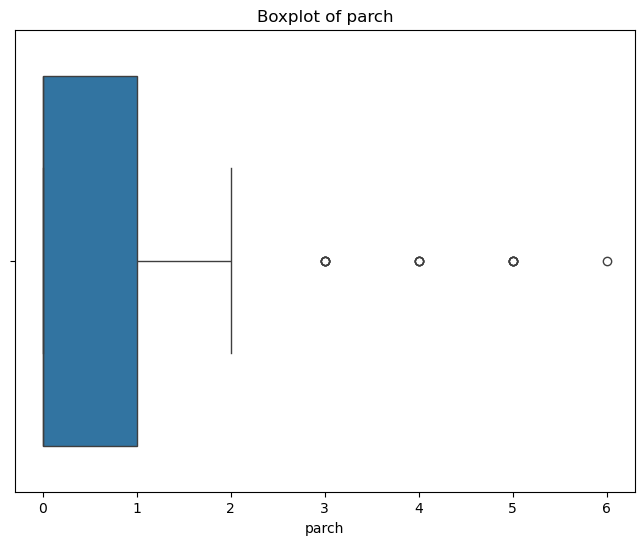

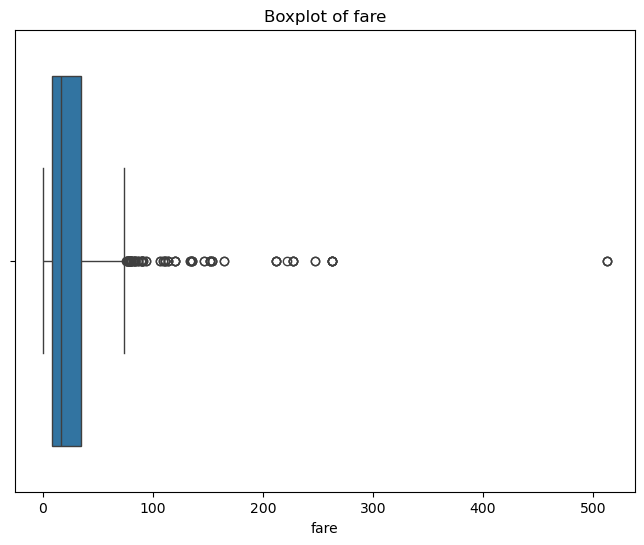

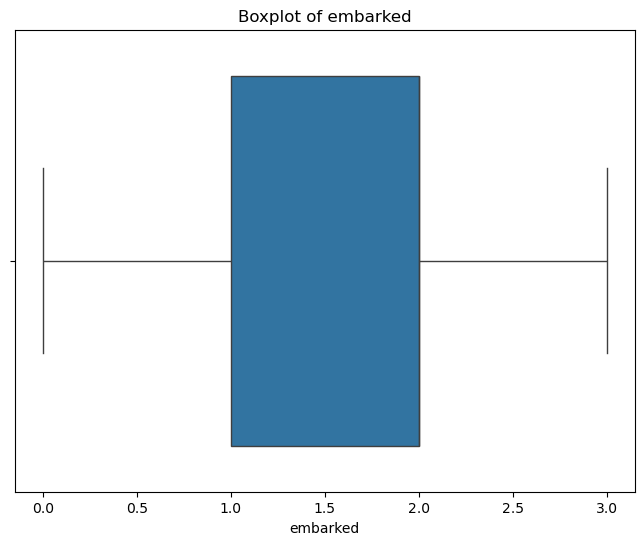

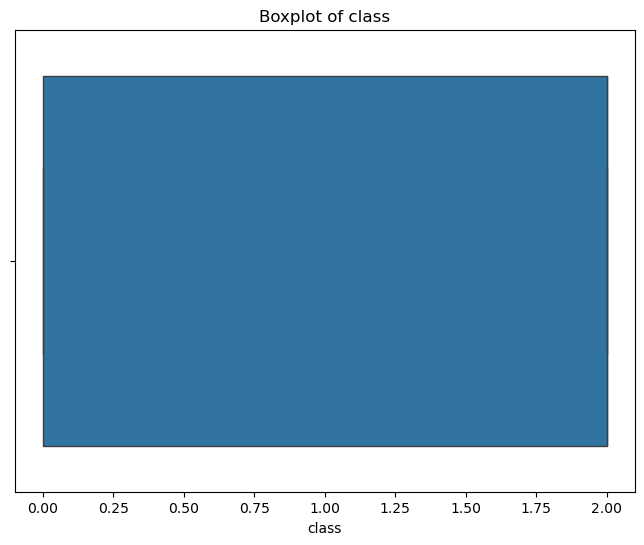

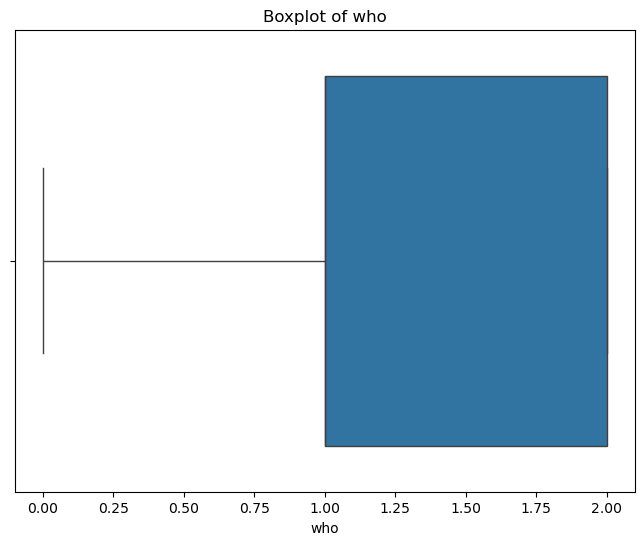

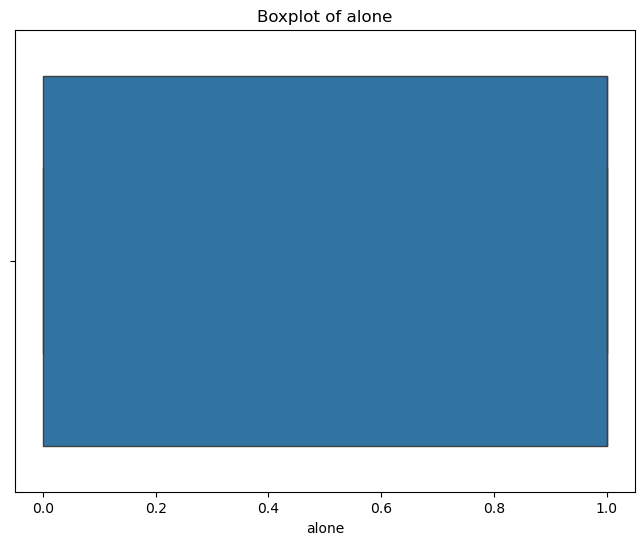

In [987]:
for column in df.columns:
  if df[column].dtype != "object":
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [988]:
df.columns

Index(['survived', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who',
       'alone'],
      dtype='object')

In [989]:
df.shape

(773, 9)

In [990]:
# def replace_outliers_with_median(df, column):
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     median = df[column].median()

#     # df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
#     df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), median, df[column])

#     return df

# columns = ['fare', 'parch', 'sibsp', 'age']

# for col in columns:
#     if df[col].dtype != "object":
#         df = replace_outliers_with_median(df, col)

# df.shape

In [991]:
X = df.drop('survived', axis=1)
y = df['survived']

In [992]:
# X = pd.get_dummies(X, drop_first=True)
# X.head()

In [993]:
X.shape, y.shape

((773, 8), (773,))

In [994]:
y.value_counts()

0    453
1    320
Name: survived, dtype: int64

In [995]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Accuracy: 0.8451612903225807

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.96      0.88        91
           1       0.92      0.69      0.79        64

    accuracy                           0.85       155
   macro avg       0.86      0.82      0.83       155
weighted avg       0.86      0.85      0.84       155



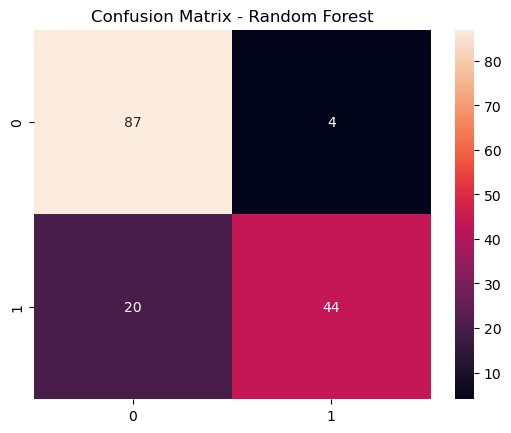

In [996]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf_classifier = RandomForestClassifier(max_depth=5, n_estimators=15, random_state=25)
rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d')
plt.title('Confusion Matrix - Random Forest')
plt.show()